In [24]:
import pandas as pd

df = pd.read_csv('results.csv')

grouped_df = df.groupby([col for col in df.columns if col != 'TimeTaken(us)'])['TimeTaken(us)'].mean().reset_index()
grouped_df

,NumVertices,NumEdges,GraphType,Algorithm,StartNode,EndNode,TimeTaken(us)
0,10,9,Sparse,A*,0,9,2010.2
1,10,9,Sparse,Bellman-Ford,0,9,4043.1
2,10,9,Sparse,Dijkstra,0,9,2936.1
3,10,9,Sparse,Floyd-Warshall,0,9,5903.6
4,10,19,Connected,A*,0,9,1857.5
...,...,...,...,...,...,...,...
247,1010,203882,Connected,Floyd-Warshall,0,1009,596705850.4
248,1010,509545,Complete,A*,0,1009,2212983.1
249,1010,509545,Complete,Bellman-Ford,0,1009,641950221.1
250,1010,509545,Complete,Dijkstra,0,1009,1404069.1


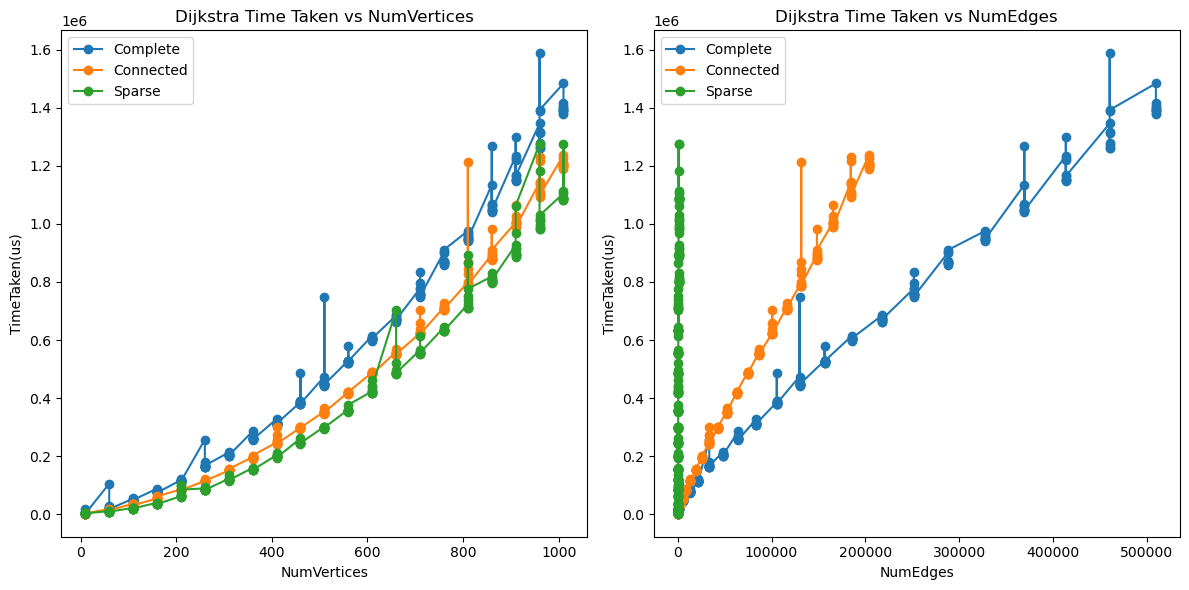

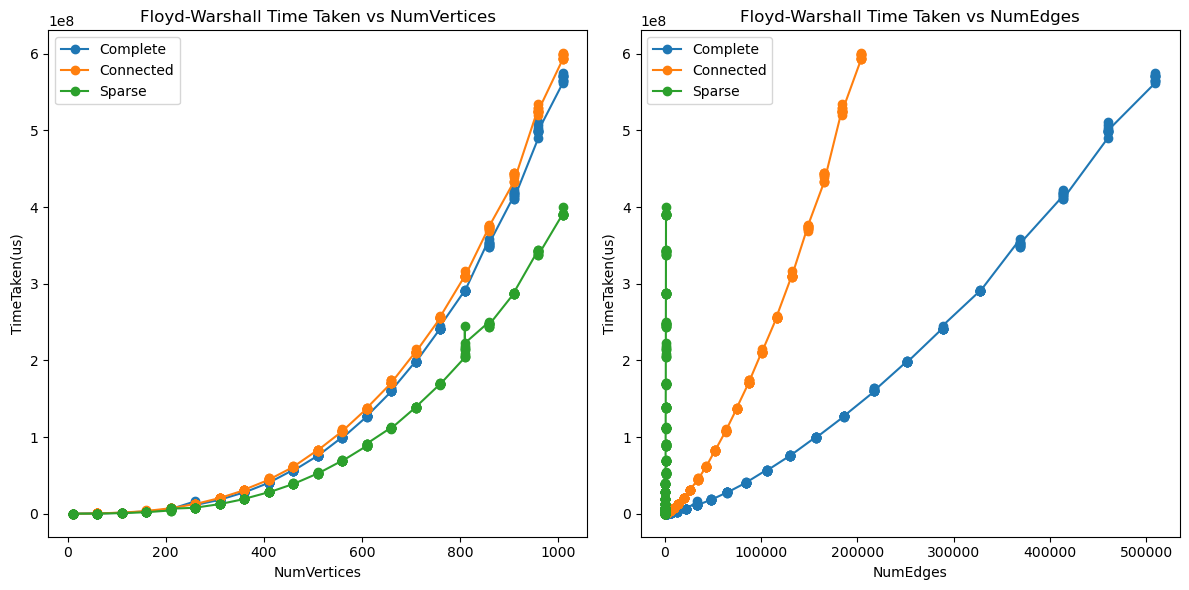

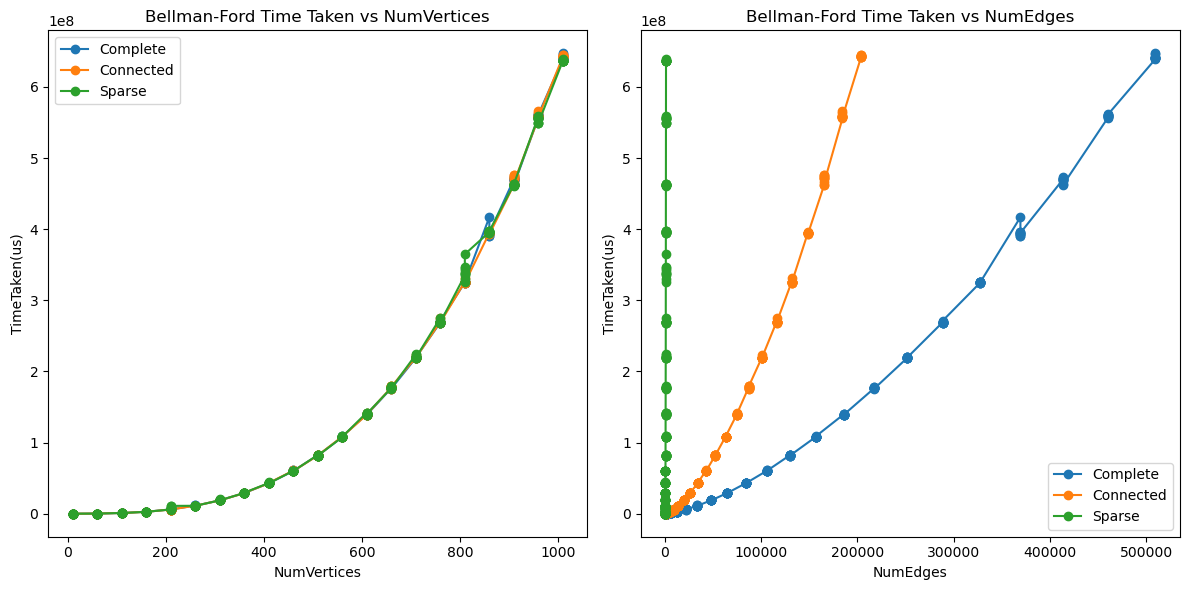

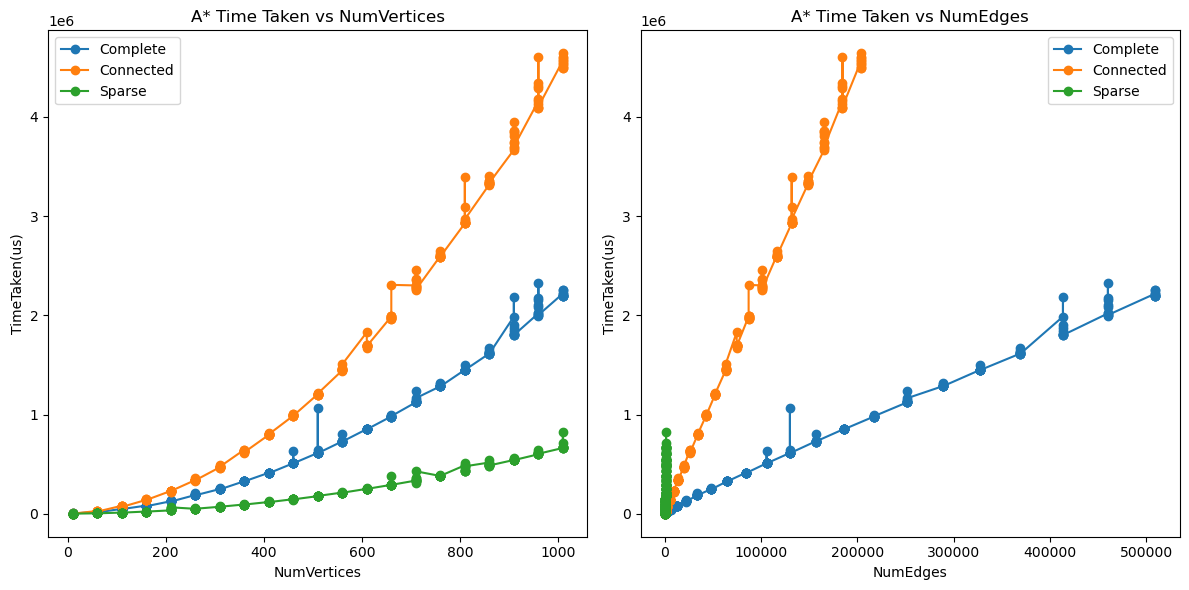

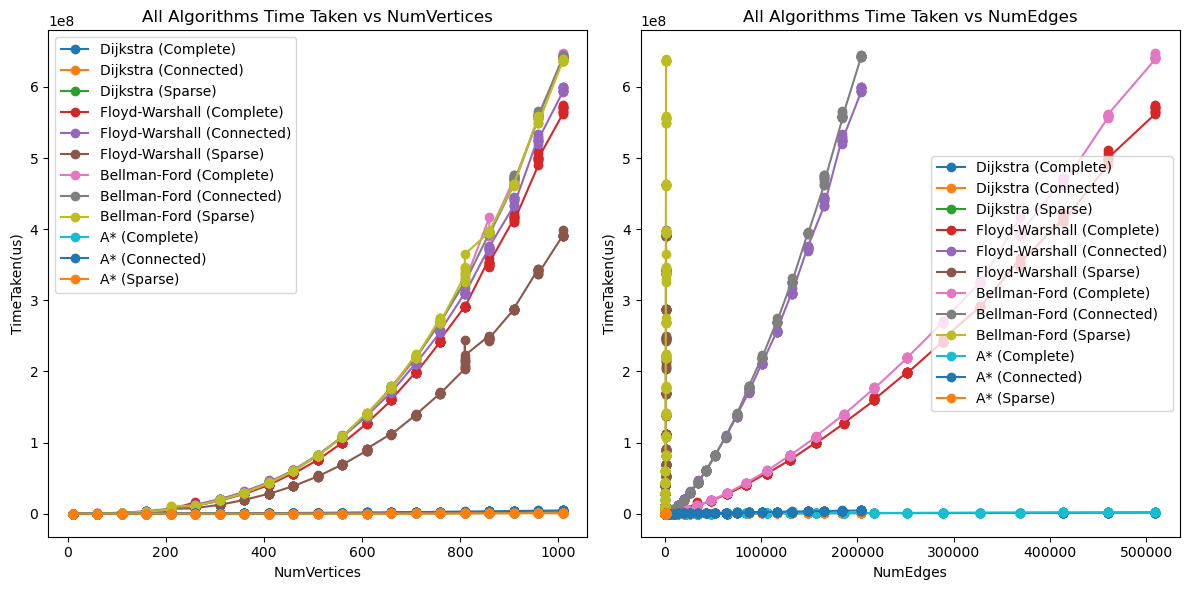

In [26]:
import matplotlib.pyplot as plt

algorithms = df['Algorithm'].unique()
graph_types = df['GraphType'].unique()

for algorithm in algorithms:
    plt.figure(figsize=(12, 6))

    for graph_type in graph_types:
        algorithm_graph_df = df[(df['Algorithm'] == algorithm) & (df['GraphType'] == graph_type)]

        plt.subplot(121)
        plt.plot(algorithm_graph_df['NumVertices'], algorithm_graph_df['TimeTaken(us)'], marker='o', label=graph_type)
        plt.title(f'{algorithm} Time Taken vs NumVertices')
        plt.xlabel('NumVertices')
        plt.ylabel('TimeTaken(us)')
        plt.legend()

        plt.subplot(122)
        plt.plot(algorithm_graph_df['NumEdges'], algorithm_graph_df['TimeTaken(us)'], marker='o', label=graph_type)
        plt.title(f'{algorithm} Time Taken vs NumEdges')
        plt.xlabel('NumEdges')
        plt.ylabel('TimeTaken(us)')
        plt.legend()

    plt.tight_layout()
    plt.show()

plt.figure(figsize=(12, 6))

for algorithm in algorithms:
    for graph_type in graph_types:
        algorithm_graph_df = df[(df['Algorithm'] == algorithm) & (df['GraphType'] == graph_type)]

        plt.subplot(121)
        plt.plot(algorithm_graph_df['NumVertices'], algorithm_graph_df['TimeTaken(us)'], marker='o', label=f'{algorithm} ({graph_type})')
        plt.title('All Algorithms Time Taken vs NumVertices')
        plt.xlabel('NumVertices')
        plt.ylabel('TimeTaken(us)')
        plt.legend()

        plt.subplot(122)
        plt.plot(algorithm_graph_df['NumEdges'], algorithm_graph_df['TimeTaken(us)'], marker='o', label=f'{algorithm} ({graph_type})')
        plt.title('All Algorithms Time Taken vs NumEdges')
        plt.xlabel('NumEdges')
        plt.ylabel('TimeTaken(us)')
        plt.legend()

plt.tight_layout()
plt.show()

Как можно видеть на графиках, с большим отрывом самыми быстрыми алгоритмами оказались алгоритм Дейкстры и A* (причем A* работает еще быстрее).

Асимптотика алгоритов (E - количество ребер, V - количество вершин):
- Дейкстра: $O(E^2)$
- Беллман-Форд: $O(VE)$
- Флойд-Уоршелл: $O(V^3)$
- A*: $O(E)$
